In [1]:
# all of these imports might not actually be necessary (hence did some import pruning)
import numpy as np
import pandas as pd
import seaborn as sns

import os
import matplotlib.pyplot as plt

### Train data processing (categorical + quantitative)

In [2]:
# categorical variable train dataframe

file_path_trainC = '/content/TRAIN/TRAIN_CATEGORICAL_METADATA.xlsx'  # adjust path as necessary
train_cat = pd.read_excel(file_path_trainC)
train_cat['PreInt_Demos_Fam_Child_Ethnicity'] = train_cat['PreInt_Demos_Fam_Child_Ethnicity'].fillna(2).astype(int)  # 2 = decline to specify
train_cat

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,UmrK0vMLopoR,2016,1,0,0,1,21,45,21,45
1,CPaeQkhcjg7d,2019,3,1,2,3,15,15,0,0
2,Nb4EetVPm3gs,2016,1,1,8,1,18,40,0,0
3,p4vPhVu91o4b,2018,3,0,8,3,15,30,18,0
4,M09PXs7arQ5E,2019,3,0,1,3,15,20,0,0
...,...,...,...,...,...,...,...,...,...,...
1208,Atx7oub96GXS,2019,1,0,0,2,21,40,21,40
1209,groSbUfkQngM,2016,1,0,0,1,18,35,0,0
1210,zmxGvIrOD0bt,2015,1,1,2,1,18,20,0,0
1211,rOmWFuJCud5G,2018,3,0,8,3,21,40,18,45


In [3]:
# quantitative variable train dataframe

file_path_trainQ = '/content/TRAIN/TRAIN_QUANTITATIVE_METADATA.xlsx'  # adjust path as necessary
train_Quant = pd.read_excel(file_path_trainQ)
nm = np.nanmean(train_Quant['MRI_Track_Age_at_Scan'])
ns = np.nanstd(train_Quant['MRI_Track_Age_at_Scan'])
train_Quant['MRI_Track_Age_at_Scan'] = train_Quant['MRI_Track_Age_at_Scan'].fillna(pd.Series([np.random.normal(nm, ns) for x in range(len(train_Quant))]))  # ages roughly normally distributed
train_Quant

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,UmrK0vMLopoR,40.00,13,3,10,47,13,11,28,0,6,1,5,0,5,1,0,10,15.226375
1,CPaeQkhcjg7d,-94.47,14,3,13,34,18,23,30,0,18,6,8,7,8,10,4,5,7.715098
2,Nb4EetVPm3gs,-46.67,14,4,10,35,16,10,29,1,14,2,8,5,7,6,4,9,8.239904
3,p4vPhVu91o4b,-26.68,10,5,12,39,19,16,28,6,24,4,16,9,10,8,4,6,11.907335
4,M09PXs7arQ5E,0.00,14,5,15,40,20,24,28,1,18,4,11,4,10,7,3,9,8.940679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,Atx7oub96GXS,87.80,14,5,14,39,20,15,21,1,9,2,7,3,6,2,0,9,10.697923
1209,groSbUfkQngM,77.80,14,3,10,32,20,11,23,6,18,3,11,9,5,7,4,7,13.964750
1210,zmxGvIrOD0bt,16.68,14,3,16,28,15,19,27,3,4,1,3,0,0,1,0,10,6.441743
1211,rOmWFuJCud5G,53.40,14,3,14,34,18,23,23,4,9,0,9,3,5,0,0,9,12.089094


### Test data processing (categorical + quantitative)

In [4]:
# categorical variable test dataframe

file_path_testC = '/content/TEST/TEST_CATEGORICAL.xlsx'  # adjust path as necessary
test_cat = pd.read_excel(file_path_testC)

test_cat['PreInt_Demos_Fam_Child_Ethnicity'] = test_cat['PreInt_Demos_Fam_Child_Ethnicity'].fillna(2).astype(int)  # 2 = decline to specify
test_cat['PreInt_Demos_Fam_Child_Race'] = test_cat['PreInt_Demos_Fam_Child_Race'].fillna(11).astype(int)  # 11 = choose not to specify
opts = np.array([3,6,9,12,15,18,21])  # possible values for edu
test_cat['Barratt_Barratt_P1_Edu'] = test_cat['Barratt_Barratt_P1_Edu'].fillna(pd.Series([opts[np.random.choice(opts.shape[0], 1, replace=False)][0] for x in range(len(test_cat))]))
test_cat['Barratt_Barratt_P2_Edu'] = test_cat['Barratt_Barratt_P2_Edu'].fillna(pd.Series([opts[np.random.choice(opts.shape[0], 1, replace=False)][0] for x in range(len(test_cat))]))
opts2 = np.array([0,5,10,15,20,15,30,35,40,45])  # possible values for occ
test_cat['Barratt_Barratt_P1_Occ'] = test_cat['Barratt_Barratt_P1_Occ'].fillna(pd.Series([opts2[np.random.choice(opts2.shape[0], 1, replace=False)][0] for x in range(len(test_cat))]))
test_cat['Barratt_Barratt_P2_Occ'] = test_cat['Barratt_Barratt_P2_Occ'].fillna(pd.Series([opts2[np.random.choice(opts2.shape[0], 1, replace=False)][0] for x in range(len(test_cat))]))
test_cat

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,Cfwaf5FX7jWK,2022,4,0,0,4,21.0,30.0,18.0,30.0
1,vhGrzmvA3Hjq,2023,4,0,0,4,21.0,45.0,12.0,30.0
2,ULliyEXjy4OV,2022,4,0,0,4,21.0,40.0,18.0,40.0
3,LZfeAb1xMtql,2022,4,0,0,3,21.0,45.0,21.0,45.0
4,EnFOUv0YK1RG,2022,4,2,0,4,18.0,0.0,21.0,45.0
...,...,...,...,...,...,...,...,...,...,...
299,UadZfjdEg7eG,2023,4,0,0,4,18.0,0.0,18.0,35.0
300,IUEHiLmQAqCi,2023,4,0,1,3,18.0,35.0,21.0,40.0
301,cRySmCadYFRO,2023,4,0,8,4,21.0,25.0,15.0,10.0
302,E3MvDUtJadc5,2022,4,0,8,4,21.0,0.0,21.0,45.0


In [5]:
# quantitative variable test dataframe

file_path_testQ = '/content/TEST/TEST_QUANTITATIVE_METADATA.xlsx'  # adjust path as necessary
test_Quant = pd.read_excel(file_path_testQ)

test_Quant['EHQ_EHQ_Total'] = test_Quant['EHQ_EHQ_Total'].fillna(pd.Series([np.random.uniform(low=test_Quant['EHQ_EHQ_Total'].min(), high=test_Quant['EHQ_EHQ_Total'].max()) for x in range(len(test_Quant))]))  # screw it it can pass for uniform
opts_cv = np.linspace(0,14,15)  # possible values for color vision test
test_Quant['ColorVision_CV_Score'] = test_Quant['ColorVision_CV_Score'].fillna(pd.Series([opts_cv[np.random.choice(opts_cv.shape[0], 1, replace=False)][0] for x in range(len(test_Quant))]))
test_Quant['APQ_P_APQ_P_CP'] = test_Quant['APQ_P_APQ_P_CP'].fillna(pd.Series([np.random.randint(low=test_Quant['APQ_P_APQ_P_CP'].min(),high=test_Quant['APQ_P_APQ_P_CP'].max()) for x in range(len(test_Quant))]))
test_Quant['APQ_P_APQ_P_ID'] = test_Quant['APQ_P_APQ_P_ID'].fillna(pd.Series([np.random.randint(low=test_Quant['APQ_P_APQ_P_ID'].min(),high=test_Quant['APQ_P_APQ_P_ID'].max()) for x in range(len(test_Quant))]))
test_Quant['APQ_P_APQ_P_INV'] = test_Quant['APQ_P_APQ_P_INV'].fillna(pd.Series([np.random.randint(low=test_Quant['APQ_P_APQ_P_INV'].min(),high=test_Quant['APQ_P_APQ_P_INV'].max()) for x in range(len(test_Quant))]))
test_Quant['APQ_P_APQ_P_OPD'] = test_Quant['APQ_P_APQ_P_OPD'].fillna(pd.Series([np.random.randint(low=test_Quant['APQ_P_APQ_P_OPD'].min(),high=test_Quant['APQ_P_APQ_P_OPD'].max()) for x in range(len(test_Quant))]))
test_Quant['APQ_P_APQ_P_PM'] = test_Quant['APQ_P_APQ_P_PM'].fillna(pd.Series([np.random.randint(low=test_Quant['APQ_P_APQ_P_PM'].min(),high=test_Quant['APQ_P_APQ_P_PM'].max()) for x in range(len(test_Quant))]))
test_Quant['APQ_P_APQ_P_PP'] = test_Quant['APQ_P_APQ_P_PP'].fillna(pd.Series([np.random.randint(low=test_Quant['APQ_P_APQ_P_PP'].min(),high=test_Quant['APQ_P_APQ_P_PP'].max()) for x in range(len(test_Quant))]))
test_Quant['SDQ_SDQ_Conduct_Problems'] = test_Quant['SDQ_SDQ_Conduct_Problems'].fillna(pd.Series([np.random.randint(low=test_Quant['SDQ_SDQ_Conduct_Problems'].min(),high=test_Quant['SDQ_SDQ_Conduct_Problems'].max()) for x in range(len(test_Quant))]))
test_Quant['SDQ_SDQ_Difficulties_Total'] = test_Quant['SDQ_SDQ_Difficulties_Total'].fillna(pd.Series([np.random.randint(low=test_Quant['SDQ_SDQ_Difficulties_Total'].min(),high=test_Quant['SDQ_SDQ_Difficulties_Total'].max()) for x in range(len(test_Quant))]))
test_Quant['SDQ_SDQ_Emotional_Problems'] = test_Quant['SDQ_SDQ_Emotional_Problems'].fillna(pd.Series([np.random.randint(low=test_Quant['SDQ_SDQ_Emotional_Problems'].min(),high=test_Quant['SDQ_SDQ_Emotional_Problems'].max()) for x in range(len(test_Quant))]))
test_Quant['SDQ_SDQ_Externalizing'] = test_Quant['SDQ_SDQ_Externalizing'].fillna(pd.Series([np.random.randint(low=test_Quant['SDQ_SDQ_Externalizing'].min(),high=test_Quant['SDQ_SDQ_Externalizing'].max()) for x in range(len(test_Quant))]))
test_Quant['SDQ_SDQ_Generating_Impact'] = test_Quant['SDQ_SDQ_Generating_Impact'].fillna(pd.Series([np.random.randint(low=test_Quant['SDQ_SDQ_Generating_Impact'].min(),high=test_Quant['SDQ_SDQ_Generating_Impact'].max()) for x in range(len(test_Quant))]))
test_Quant['SDQ_SDQ_Hyperactivity'] = test_Quant['SDQ_SDQ_Hyperactivity'].fillna(pd.Series([np.random.randint(low=test_Quant['SDQ_SDQ_Hyperactivity'].min(),high=test_Quant['SDQ_SDQ_Hyperactivity'].max()) for x in range(len(test_Quant))]))
test_Quant['SDQ_SDQ_Internalizing'] = test_Quant['SDQ_SDQ_Internalizing'].fillna(pd.Series([np.random.randint(low=test_Quant['SDQ_SDQ_Internalizing'].min(),high=test_Quant['SDQ_SDQ_Internalizing'].max()) for x in range(len(test_Quant))]))
test_Quant['SDQ_SDQ_Peer_Problems'] = test_Quant['SDQ_SDQ_Peer_Problems'].fillna(pd.Series([np.random.randint(low=test_Quant['SDQ_SDQ_Peer_Problems'].min(),high=test_Quant['SDQ_SDQ_Peer_Problems'].max()) for x in range(len(test_Quant))]))
test_Quant['SDQ_SDQ_Prosocial'] = test_Quant['SDQ_SDQ_Prosocial'].fillna(pd.Series([np.random.randint(low=test_Quant['SDQ_SDQ_Prosocial'].min(),high=test_Quant['SDQ_SDQ_Prosocial'].max()) for x in range(len(test_Quant))]))
test_Quant

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,Cfwaf5FX7jWK,60.03,14.0,5.0,16.0,41.0,19.0,11.0,26.0,2.0,12.0,3.0,9.0,2.0,7.0,3.0,0.0,8.0,8.992813
1,vhGrzmvA3Hjq,86.71,12.0,3.0,13.0,43.0,18.0,15.0,28.0,2.0,16.0,8.0,5.0,7.0,3.0,11.0,3.0,9.0,12.324093
2,ULliyEXjy4OV,26.68,13.0,3.0,14.0,36.0,16.0,14.0,25.0,1.0,7.0,1.0,6.0,1.0,5.0,1.0,0.0,9.0,7.770933
3,LZfeAb1xMtql,93.38,13.0,3.0,19.0,41.0,17.0,18.0,27.0,4.0,15.0,4.0,10.0,8.0,6.0,5.0,1.0,6.0,9.304814
4,EnFOUv0YK1RG,-93.38,14.0,3.0,13.0,42.0,19.0,16.0,28.0,2.0,18.0,6.0,12.0,5.0,10.0,6.0,0.0,10.0,8.261350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,UadZfjdEg7eG,86.71,14.0,3.0,17.0,41.0,17.0,11.0,25.0,1.0,18.0,7.0,7.0,5.0,6.0,11.0,4.0,7.0,7.546999
300,IUEHiLmQAqCi,73.37,14.0,5.0,12.0,38.0,22.0,9.0,29.0,2.0,16.0,2.0,11.0,5.0,9.0,5.0,3.0,8.0,10.531143
301,cRySmCadYFRO,87.84,13.0,3.0,14.0,42.0,15.0,10.0,28.0,1.0,11.0,4.0,4.0,4.0,3.0,7.0,3.0,10.0,7.210586
302,E3MvDUtJadc5,46.76,14.0,3.0,16.0,43.0,18.0,12.0,22.0,5.0,21.0,2.0,10.0,6.0,5.0,11.0,9.0,0.0,12.212183


### Other visualizations for processing

In [6]:
# change dataframe as necessary to check NaNs (all should be 0)
print(test_Quant.isna().sum())

participant_id                0
EHQ_EHQ_Total                 0
ColorVision_CV_Score          0
APQ_P_APQ_P_CP                0
APQ_P_APQ_P_ID                0
APQ_P_APQ_P_INV               0
APQ_P_APQ_P_OPD               0
APQ_P_APQ_P_PM                0
APQ_P_APQ_P_PP                0
SDQ_SDQ_Conduct_Problems      0
SDQ_SDQ_Difficulties_Total    0
SDQ_SDQ_Emotional_Problems    0
SDQ_SDQ_Externalizing         0
SDQ_SDQ_Generating_Impact     0
SDQ_SDQ_Hyperactivity         0
SDQ_SDQ_Internalizing         0
SDQ_SDQ_Peer_Problems         0
SDQ_SDQ_Prosocial             0
MRI_Track_Age_at_Scan         0
dtype: int64


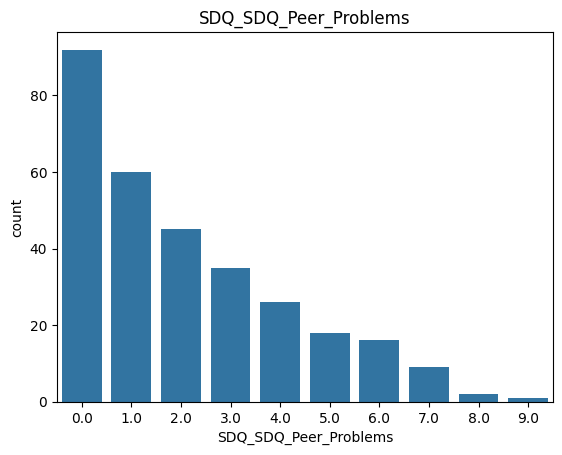

In [7]:
# for data distribution visualization (not necessarily as helpful as it could be...)
# (... because half of the time i can't even draw from the distributions anyways! sadge.)

sns.countplot(x='SDQ_SDQ_Peer_Problems', data=test_Quant[['SDQ_SDQ_Peer_Problems']])
#plt.hist(x, bins=50)
#plt.scatter(x,pdf, c='tab:orange')
plt.title(f'SDQ_SDQ_Peer_Problems')
#plt.xticks(rotation=45)
plt.show()